<div align="center">
<h1 style="font-weight:bold;"><b>Pratical1</b></h1>
</div>



Practical No. 1
Find out the age of Abalone from physical measurements. Use Regression Models.
Use the data set abalone.data.csv

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving abalone_original.csv to abalone_original.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df=pd.read_csv('abalone_original.csv')
df.head(10)

sex  length  diameter  height  whole-weight  shucked-weight  viscera-weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   
5   I      85        60      19          70.3            28.2            15.5   
6   F     106        83      30         155.5            47.4            28.3   
7   F     109        85      25         153.6            58.8            29.9   
8   M      95        74      25         101.9            43.3            22.5   
9   F     110        88      30         178.9            62.9            30.2   

   shell-weight  rings  
0          30.0     15  
1          14.0      7  
2          42.0      9  
3          31.0     10  
4          11.0      7  
5          24.0      8  
6          66.0     20  
7          52.0     16  
8          33.0      9  
9          64.0     19

In [ ]:
df.shape

(4177, 9)

In [ ]:
df['age'] = df.rings + 1.5
df.head()

sex  length  diameter  height  whole-weight  shucked-weight  viscera-weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   

   shell-weight  rings   age  
0          30.0     15  16.5  
1          14.0      7   8.5  
2          42.0      9  10.5  
3          31.0     10  11.5  
4          11.0      7   8.5

In [ ]:
df_info = pd.DataFrame(df.dtypes, columns=['Data Type'])
df_info['Null Count'] = df.isnull().sum()
df_info

Data Type  Null Count
sex               object           0
length             int64           0
diameter           int64           0
height             int64           0
whole-weight     float64           0
shucked-weight   float64           0
viscera-weight   float64           0
shell-weight     float64           0
rings              int64           0
age              float64           0

In [ ]:
df.head()

sex  length  diameter  height  whole-weight  shucked-weight  viscera-weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   

   shell-weight  rings   age  
0          30.0     15  16.5  
1          14.0      7   8.5  
2          42.0      9  10.5  
3          31.0     10  11.5  
4          11.0      7   8.5

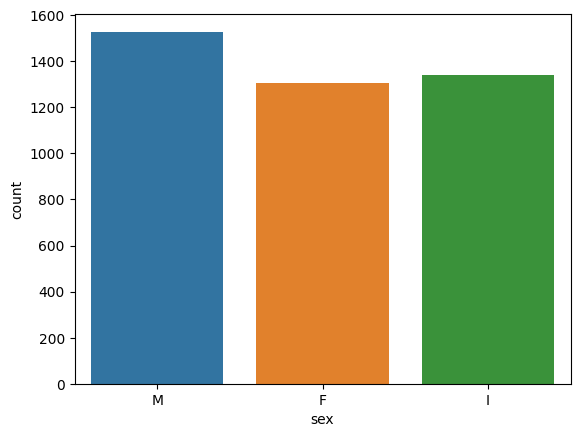

In [ ]:
sns.countplot(x='sex', data=df)
plt.show()

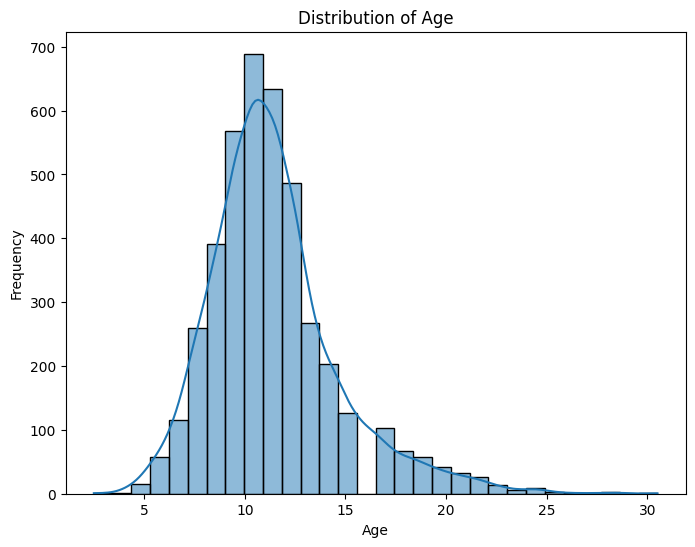

In [ ]:
# Visualize the distribution of the target variable ('age')
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
final_df = pd.concat([pd.get_dummies(df.sex, drop_first=True), df.drop('sex', 1)], axis=1)
final_df.head()

I  M  length  diameter  height  whole-weight  shucked-weight  \
0  0  1      91        73      19         102.8            44.9   
1  0  1      70        53      18          45.1            19.9   
2  0  0     106        84      27         135.4            51.3   
3  0  1      88        73      25         103.2            43.1   
4  1  0      66        51      16          41.0            17.9   

   viscera-weight  shell-weight  rings   age  
0            20.2          30.0     15  16.5  
1             9.7          14.0      7   8.5  
2            28.3          42.0      9  10.5  
3            22.8          31.0     10  11.5  
4             7.9          11.0      7   8.5

In [ ]:
X, y = final_df.drop('rings', 1).values, final_df.rings.values

X.shape, y.shape

((4177, 10), (4177,))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
# Calculate Mean Squared Error (MSE) for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [ ]:
print(f'Mean Squared Error (MSE) - Training Set:')
print(mse_train)
print(f'Mean Squared Error (MSE) - Testing Set:')
print(mse_test)

Mean Squared Error (MSE) - Training Set:
4.5424374703219095e-29
Mean Squared Error (MSE) - Testing Set:
5.01662693363276e-29


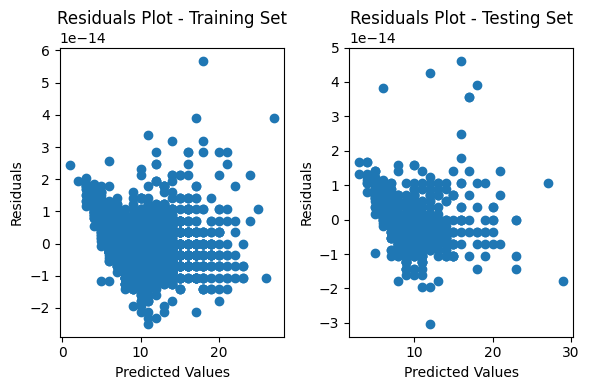

In [ ]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train)
plt.title('Residuals Plot - Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test)
plt.title('Residuals Plot - Testing Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

<div align="center">
<h1 style="font-weight:bold;"><b>Pratical2</b></h1>
</div>



Q2 .Predict student's knowledge level. Use Classification/Clustering Models. Use the
data set Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving User Knowledge.csv to User Knowledge.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

In [ ]:
df = pd.read_csv('User Knowledge.csv')
df.head()

STG   SCG   STR   LPR   PEG
0  0.00  0.00  0.00  0.00  0.00
1  0.08  0.08  0.10  0.24  0.90
2  0.06  0.06  0.05  0.25  0.33
3  0.10  0.10  0.15  0.65  0.30
4  0.08  0.08  0.08  0.98  0.24

In [ ]:
pd.DataFrame(df.describe())

STG         SCG         STR         LPR         PEG
count  403.000000  403.000000  403.000000  403.000000  403.000000
mean     0.353141    0.355940    0.457655    0.431342    0.456360
std      0.212018    0.215531    0.246684    0.257545    0.266775
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.200000    0.265000    0.250000    0.250000
50%      0.300000    0.300000    0.440000    0.330000    0.400000
75%      0.480000    0.510000    0.680000    0.650000    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.990000

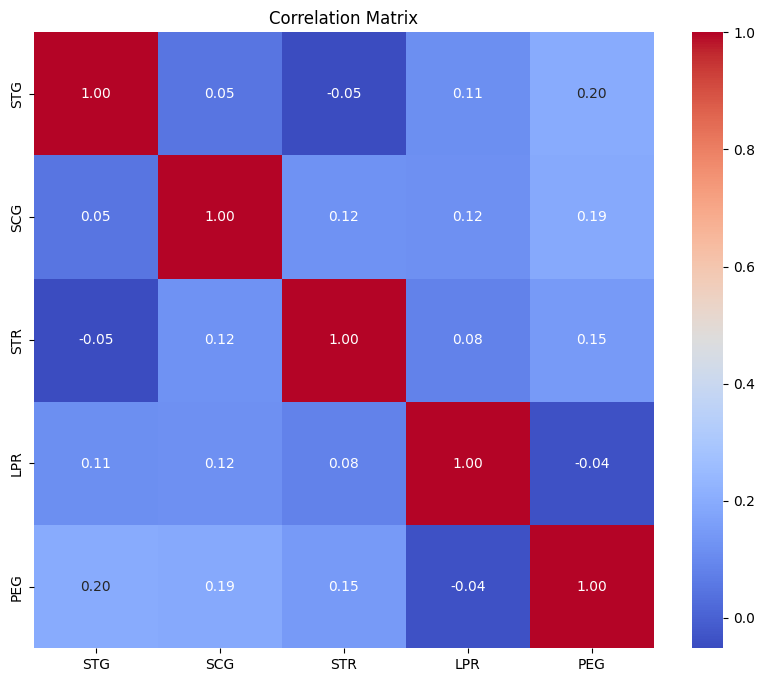

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

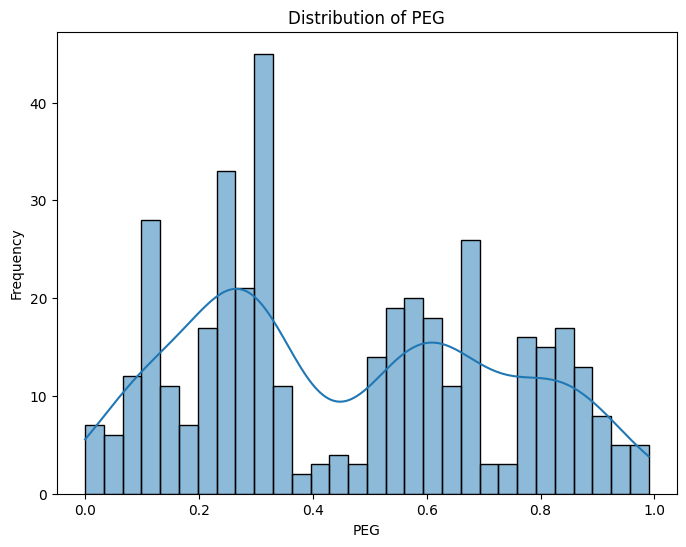

In [ ]:
# Visualize the distribution of the target variable 'PEG'
plt.figure(figsize=(8, 6))
sns.histplot(df['PEG'], bins=30, kde=True)
plt.title('Distribution of PEG')
plt.xlabel('PEG')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Using SelectKBest to select the top k features based on ANOVA F-statistic
X = df[['STG', 'SCG', 'STR', 'LPR']]
y = df['PEG']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
selector = SelectKBest(f_classif, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]


In [ ]:
print("Selected Features:", selected_features)

Selected Features: ['STG', 'SCG', 'STR', 'LPR']


In [ ]:
# Convert 'y_train' to integer classes
y_train_int = y_train.astype(int)

# Create and fit the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train_int)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_int = y_test.astype(int)

In [ ]:
# Transform 'X_test' using the same selector used for training data
X_test_selected = selector.transform(X_test)


In [ ]:
y_pred = model.predict(X_test_selected)

In [ ]:
print("Classification Report:\n", classification_report(y_test_int, y_pred))
print("Accuracy:", accuracy_score(y_test_int, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Accuracy: 1.0


<div align="center">
<h1 style="font-weight:bold;"><b>Pratical3</b></h1>
</div>



Q.3 Can you estimate location from WIFI Signal Strength Use Classification Models Use the data set wifi_localization.txt

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving wifi_localization.txt to wifi_localization.txt


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('wifi_localization.txt',sep='\t')
df.head()

Access Point 1  Access Point 2  Access Point 3  Access Point 4  \
0             -64             -56             -61             -66   
1             -68             -57             -61             -65   
2             -63             -60             -60             -67   
3             -61             -60             -68             -62   
4             -63             -65             -60             -63   

   Access Point 5  Access Point 6  Access Point 7  Class  
0             -71             -82             -81      1  
1             -71             -85             -85      1  
2             -76             -85             -84      1  
3             -77             -90             -80      1  
4             -77             -81             -87      1

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Encode the target variable if it's not already encoded
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       0.98      0.96      0.97        95
           2       0.96      0.98      0.97        88
           3       1.00      0.99      1.00       113

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Accuracy: 0.9825


<div align="center">
<h1 style="font-weight:bold;"><b>Pratical4</b></h1>
</div>



Q.4 Predict acceptability of a car. Use Classification Models. Use the data set car.data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset directly from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df = pd.read_csv(url, names=column_names)
df.head()

buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc

In [ ]:
pd.DataFrame(df.info()).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Empty DataFrame
Columns: []
Index: []

In [ ]:
pd.DataFrame(df.describe()).T

count unique    top  freq
buying         1728      4  vhigh   432
maint          1728      4  vhigh   432
doors          1728      4      2   432
persons        1728      3      2   576
lug_boot       1728      3  small   576
safety         1728      3    low   576
acceptability  1728      4  unacc  1210

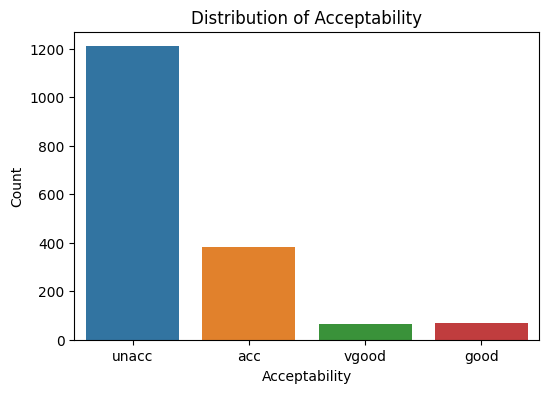

In [ ]:
# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='acceptability', data=df)
plt.title('Distribution of Acceptability')
plt.xlabel('Acceptability')
plt.ylabel('Count')
plt.show()


In [ ]:
# Preprocessing and Feature Engineering
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


In [ ]:
# Assign features to X and the target variable to y
X = df_encoded.drop('acceptability', axis=1)
y = df_encoded['acceptability']

In [ ]:
# Encode the target variable if it's not already encoded
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Feature Selection
# Using SelectKBest to select the top k features based on ANOVA F-statistic
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Choose a classification model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.69        83
           1       0.18      0.18      0.18        11
           2       0.92      0.95      0.94       235
           3       0.71      0.59      0.65        17

    accuracy                           0.84       346
   macro avg       0.63      0.60      0.61       346
weighted avg       0.84      0.84      0.84       346

Accuracy: 0.8410404624277457


<div align="center">
<h1 style="font-weight:bold;"><b>Pratical5</b></h1>
</div>



Q.5 Predict total number of demand of orders. Use Regression Models. Use the data set
Daily_Demand_Forecasting_Orders.csv

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving Daily_Demand_Forecasting_Orders.csv to Daily_Demand_Forecasting_Orders.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Replace with the correct local path to your dataset
local_path = "Daily_Demand_Forecasting_Orders.csv"
df = pd.read_csv(local_path,sep=';')
df.head()



Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448                 0.000   
1        38.058        56.037       130.580                 0.000   
2        21.826        25.125        82.461                 1.386   
3        41.542       113.294       162.284                18.156   
4        37.679        56.618       116.220                 6.459   

   Orders from the traffic controller sector  Banking orders (1)  \
0                                      65556               44914   
1                                      40419               21399   
2                                      11992                3452   
3                                      49971               33703   
4                                      48534               19646   

   Banking orders (2)  Banking orders (3)  Target (Total orders)  
0              188411               14793                539.577  
1               89461                7679                224.675  
2               21305               14947                129.412  
3               69054               18423                317.120  
4               16411               20257                210.517

In [ ]:
# EDA (Exploratory Data Analysis)
# Display basic statistics and data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

In [ ]:
pd.DataFrame(df.describe())

Week of the month (first week, second, third, fourth or fifth week  \
count                                          60.000000                    
mean                                            3.016667                    
std                                             1.282102                    
min                                             1.000000                    
25%                                             2.000000                    
50%                                             3.000000                    
75%                                             4.000000                    
max                                             5.000000                    

       Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
count                           60.000000         60.000000     60.000000   
mean                             4.033333        172.554933    118.920850   
std                              1.401775         69.505788     27.170929   
min                              2.000000         43.651000     77.371000   
25%                              3.000000        125.348000    100.888000   
50%                              4.000000        151.062500    113.114500   
75%                              5.000000        194.606500    132.108250   
max                              6.000000        435.304000    223.270000   

       Order type A  Order type B  Order type C  Fiscal sector orders  \
count     60.000000     60.000000     60.000000             60.000000   
mean      52.112217    109.229850    139.531250             77.396133   
std       18.829911     50.741388     41.442932            186.502470   
min       21.826000     25.125000     74.372000              0.000000   
25%       39.456250     74.916250    113.632250              1.243250   
50%       47.166500     99.482000    127.990000              7.831500   
75%       58.463750    132.171000    160.107500             20.360750   
max      118.178000    267.342000    302.448000            865.000000   

       Orders from the traffic controller sector  Banking orders (1)  \
count                                  60.000000           60.000000   
mean                                44504.350000        46640.833333   
std                                 12197.905134        45220.736293   
min                                 11992.000000         3452.000000   
25%                                 34994.250000        20130.000000   
50%                                 44312.000000        32527.500000   
75%                                 52111.750000        45118.750000   
max                                 71772.000000       210508.000000   

       Banking orders (2)  Banking orders (3)  Target (Total orders)  
count           60.000000           60.000000              60.000000  
mean         79401.483333        23114.633333             300.873317  
std          40504.420041        13148.039829              89.602041  
min          16411.000000         7679.000000             129.412000  
25%          50680.500000        12609.750000             238.195500  
50%          67181.000000        18011.500000             288.034500  
75%          94787.750000        31047.750000             334.237250  
max         188411.000000        73839.000000             616.453000

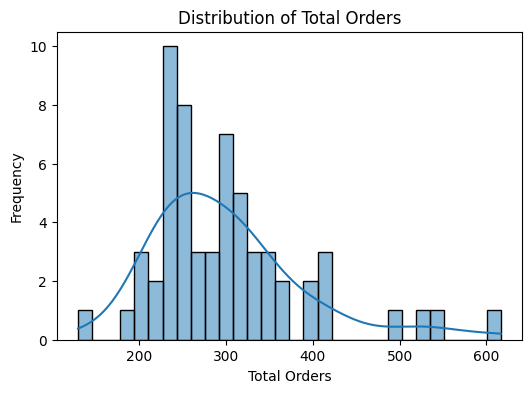

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['Target (Total orders)'], bins=30, kde=True)
plt.title('Distribution of Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X = df.drop('Target (Total orders)', axis=1)
y = df['Target (Total orders)']

In [ ]:
selector = SelectKBest(f_regression, k='all')
X_selected = selector.fit_transform(X, y)

In [ ]:
# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]
print("Selected Features:", selected_features)

Selected Features: ['Week of the month (first week, second, third, fourth or fifth week', 'Day of the week (Monday to Friday)', 'Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders', 'Orders from the traffic controller sector', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Regression Model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE):')
print(mse)
print(f'R-squared (R2):')
print(r2)


Mean Squared Error (MSE):
1.5454033361511132e-23
R-squared (R2):
1.0


<div align="center">
<h1 style="font-weight:bold;"><b>Pratical6</b></h1>
</div>



Q6.Forecast pollution level of a city. Use Regression Models. Use the data set
PRSA_data_2010.1.1-2014.12.31.csv

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
df=pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [ ]:
df = df.dropna(subset=['pm2.5'])

In [ ]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


Empty DataFrame
Columns: []
Index: []

In [ ]:
pd.DataFrame(df.describe())

No          year         month           day          hour  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean   22279.380104   2012.042771      6.513758     15.685514     11.502311   
std    12658.168415      1.415311      3.454199      8.785539      6.924848   
min       25.000000   2010.000000      1.000000      1.000000      0.000000   
25%    11464.000000   2011.000000      4.000000      8.000000      5.000000   
50%    22435.000000   2012.000000      7.000000     16.000000     12.000000   
75%    33262.000000   2013.000000     10.000000     23.000000     18.000000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean      98.613215      1.750174     12.401561   1016.442896     23.866747   
std       92.050387     14.433658     12.175215     10.300733     49.617495   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      137.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    565.490000   

                 Is            Ir  
count  41757.000000  41757.000000  
mean       0.055344      0.194866  
std        0.778875      1.418165  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       27.000000     36.000000

In [ ]:
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0

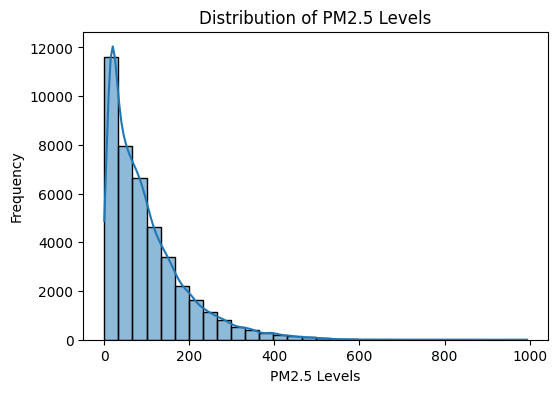

In [ ]:
# Visualize the distribution of the target variable ('pm2.5')
plt.figure(figsize=(6, 4))
sns.histplot(df['pm2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Levels')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Engineering
# You may need to engineer features based on domain knowledge.
# For example, you can create new features, handle missing values, or transform existing features.

# Handling Categorical Feature 'cbwd'
le_cbwd = LabelEncoder()
df['cbwd'] = le_cbwd.fit_transform(df['cbwd'])

In [ ]:
# Feature Selection
# Using SelectKBest to select the top k features based on F-statistic
X = df[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]
y = df['pm2.5']


In [ ]:
selector = SelectKBest(f_regression, k='all')
X_selected = selector.fit_transform(X, y)


In [ ]:
# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]
print("Selected Features:", selected_features)

Selected Features: ['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Regression Model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 6457.62
R-squared (R2): 0.27


<div align="center">
<h1 style="font-weight:bold;"><b>Pratical7</b></h1>
</div>



Q7.Will the patient survive for at least one year after a heart attack Use Classification
Models Use the data set echocardiogram.data

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving echocardiogram.data.txt to echocardiogram.data.txt


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Load the dataset
url = "echocardiogram.data.txt"
column_names = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion',
                'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score',
                'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']
df = pd.read_csv(url, names=column_names, na_values='?', error_bad_lines=False)


<ipython-input-8-c5f97c884efc>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, names=column_names, na_values='?', error_bad_lines=False)
Skipping line 50: expected 13 fields, saw 14



In [ ]:
df.head()

survival  still-alive  age-at-heart-attack  pericardial-effusion  \
0      11.0            0                 71.0                     0   
1      19.0            0                 72.0                     0   
2      16.0            0                 55.0                     0   
3      57.0            0                 60.0                     0   
4      19.0            1                 57.0                     0   

   fractional-shortening    epss   lvdd  wall-motion-score  wall-motion-index  \
0                  0.260   9.000  4.600               14.0               1.00   
1                  0.380   6.000  4.100               14.0               1.70   
2                  0.260   4.000  3.420               14.0               1.00   
3                  0.253  12.062  4.603               16.0               1.45   
4                  0.160  22.000  5.750               18.0               2.25   

    mult  name  group  alive-at-1  
0  1.000  name    1.0         0.0  
1  0.588  name    1.0         0.0  
2  1.000  name    1.0         0.0  
3  0.788  name    1.0         0.0  
4  0.571  name    1.0         0.0

In [ ]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               130 non-null    float64
 1   still-alive            131 non-null    int64  
 2   age-at-heart-attack    126 non-null    float64
 3   pericardial-effusion   131 non-null    int64  
 4   fractional-shortening  124 non-null    float64
 5   epss                   117 non-null    float64
 6   lvdd                   121 non-null    float64
 7   wall-motion-score      128 non-null    float64
 8   wall-motion-index      130 non-null    float64
 9   mult                   128 non-null    float64
 10  name                   131 non-null    object 
 11  group                  109 non-null    float64
 12  alive-at-1             74 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 13.4+ KB


Empty DataFrame
Columns: []
Index: []

In [ ]:
pd.DataFrame(df.describe())

survival  still-alive  age-at-heart-attack  pericardial-effusion  \
count  130.000000   131.000000           126.000000            131.000000   
mean    22.182923     0.328244            62.813722              0.183206   
std     15.858267     0.471377             8.342110              0.388320   
min      0.030000     0.000000            35.000000              0.000000   
25%      7.875000     0.000000            57.000000              0.000000   
50%     23.500000     0.000000            62.000000              0.000000   
75%     33.000000     1.000000            67.750000              0.000000   
max     57.000000     1.000000            86.000000              1.000000   

       fractional-shortening        epss        lvdd  wall-motion-score  \
count             124.000000  117.000000  121.000000         128.000000   
mean                0.216734   12.164769    4.763157          14.438125   
std                 0.107513    7.370159    0.810013           5.018566   
min                 0.010000    0.000000    2.320000           2.000000   
25%                 0.150000    7.000000    4.230000          11.000000   
50%                 0.205000   11.000000    4.650000          14.000000   
75%                 0.270000   16.100000    5.300000          16.500000   
max                 0.610000   40.000000    6.780000          39.000000   

       wall-motion-index        mult       group  alive-at-1  
count          130.00000  128.000000  109.000000   74.000000  
mean             1.37800    0.776719    1.779817    0.324324  
std              0.45185    0.199078    0.416284    0.471317  
min              1.00000    0.140000    1.000000    0.000000  
25%              1.00000    0.713000    2.000000    0.000000  
50%              1.21600    0.786000    2.000000    0.000000  
75%              1.50750    0.857000    2.000000    1.000000  
max              3.00000    2.000000    2.000000    1.000000

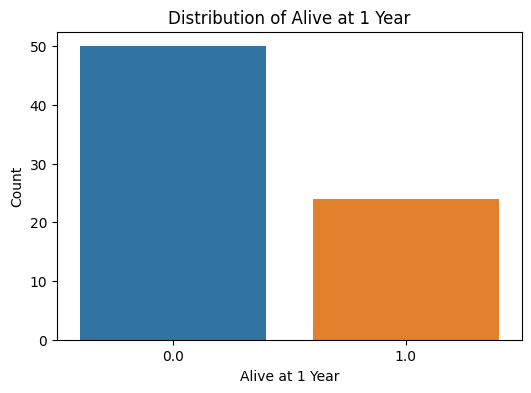

In [ ]:
# Visualize the distribution of the target variable ('alive-at-1')
plt.figure(figsize=(6, 4))
sns.countplot(x='alive-at-1', data=df)
plt.title('Distribution of Alive at 1 Year')
plt.xlabel('Alive at 1 Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Feature Engineering
# Handle missing values
df = df.dropna(subset=['alive-at-1'])

In [ ]:
# Handling Categorical Feature 'still-alive'
le_still_alive = LabelEncoder()
df['still-alive'] = le_still_alive.fit_transform(df['still-alive'])

In [ ]:
# Separate features and target
X = df[['age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening',
        'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult']]
y = df['alive-at-1']

In [ ]:
# Impute missing values in features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
# Feature Selection
selector = SelectKBest(f_classif, k='all')
X_selected = selector.fit_transform(X_imputed, y)

In [ ]:
# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]
print("Selected Features:", selected_features)

Selected Features: ['age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Classification Model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15

Accuracy: 0.7333333333333333


<div align="center">
<h1 style="font-weight:bold;"><b>Pratical8</b></h1>
</div>



Q.8 Predict which stock will provide greatest rate of return. Use
Classification/Clustering/ Regression Models. Use the data set
dow_jones_index.data

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving dow_jones_index.csv to dow_jones_index.csv


In [ ]:
df=pd.read_csv('dow_jones_index.csv')
df.head()

quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15.79   
2            242963398.0          $15.87           $16.13   
3            138428495.0          $16.18           $17.14   
4            151379173.0          $17.33           $17.37   

   percent_change_next_weeks_price  days_to_next_dividend  \
0                        -4.428490                     26   
1                        -2.470660                     19   
2                         1.638310                     12   
3                         5.933250                      5   
4                         0.230814                     97   

   percent_return_next_dividend  
0                      0.182704  
1                      0.187852  
2                      0.189994  
3                      0.185989  
4                      0.175029

In [ ]:
# Convert columns with dollar signs to numeric
dollar_columns = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
df[dollar_columns] = df[dollar_columns].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

Empty DataFrame
Columns: []
Index: []

In [ ]:
pd.DataFrame(df.describe())

quarter        open        high         low       close  \
count  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     1.520000   53.651840   54.669987   52.640160   53.729267   
std      0.499933   32.638852   33.215994   32.119277   32.788787   
min      1.000000   10.590000   10.940000   10.400000   10.520000   
25%      1.000000   29.830000   30.627500   28.720000   30.365000   
50%      2.000000   45.970000   46.885000   44.800000   45.930000   
75%      2.000000   72.715000   74.287500   71.037500   72.667500   
max      2.000000  172.110000  173.540000  167.820000  170.580000   

             volume  percent_change_price  percent_change_volume_over_last_wk  \
count  7.500000e+02            750.000000                          720.000000   
mean   1.175478e+08              0.050262                            5.593627   
std    1.584381e+08              2.517809                           40.543478   
min    9.718851e+06            -15.422900                          -61.433175   
25%    3.086624e+07             -1.288053                          -19.804284   
50%    5.306088e+07              0.000000                            0.512586   
75%    1.327218e+08              1.650888                           21.800622   
max    1.453439e+09              9.882230                          327.408924   

       previous_weeks_volume  next_weeks_open  next_weeks_close  \
count           7.200000e+02       750.000000        750.000000   
mean            1.173876e+08        53.702440         53.889080   
std             1.592322e+08        32.778111         33.016677   
min             9.718851e+06        10.520000         10.520000   
25%             3.067832e+07        30.315000         30.462500   
50%             5.294556e+07        46.015000         46.125000   
75%             1.333230e+08        72.715000         72.915000   
max             1.453439e+09       172.110000        174.540000   

       percent_change_next_weeks_price  days_to_next_dividend  \
count                       750.000000             750.000000   
mean                          0.238468              52.525333   
std                           2.679538              46.335098   
min                         -15.422900               0.000000   
25%                          -1.222068              24.000000   
50%                           0.101193              47.000000   
75%                           1.845562              69.000000   
max                           9.882230             336.000000   

       percent_return_next_dividend  
count                    750.000000  
mean                       0.691826  
std                        0.305482  
min                        0.065574  
25%                        0.534549  
50%                        0.681067  
75%                        0.854291  
max                        1.564210

In [ ]:
df.head()

quarter stock       date   open   high    low  close     volume  \
0        1    AA 2011-01-07  15.82  16.72  15.78  16.42  239655616   
1        1    AA 2011-01-14  16.71  16.71  15.64  15.97  242963398   
2        1    AA 2011-01-21  16.19  16.38  15.60  15.79  138428495   
3        1    AA 2011-01-28  15.87  16.63  15.82  16.13  151379173   
4        1    AA 2011-02-04  16.18  17.39  16.18  17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume  next_weeks_open  next_weeks_close  \
0                    NaN            16.71             15.97   
1            239655616.0            16.19             15.79   
2            242963398.0            15.87             16.13   
3            138428495.0            16.18             17.14   
4            151379173.0            17.33             17.37   

   percent_change_next_weeks_price  days_to_next_dividend  \
0                        -4.428490                     26   
1                        -2.470660                     19   
2                         1.638310                     12   
3                         5.933250                      5   
4                         0.230814                     97   

   percent_return_next_dividend  
0                      0.182704  
1                      0.187852  
2                      0.189994  
3                      0.185989  
4                      0.175029

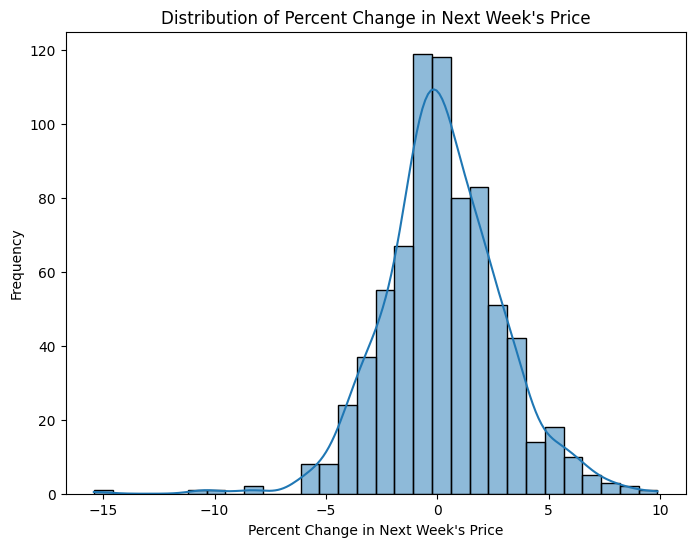

In [ ]:
# Visualize the distribution of the target variable ('percent_change_next_weeks_price')
plt.figure(figsize=(8, 6))
sns.histplot(df['percent_change_next_weeks_price'], bins=30, kde=True)
plt.title('Distribution of Percent Change in Next Week\'s Price')
plt.xlabel('Percent Change in Next Week\'s Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Engineering
# Extract relevant features
X = df[['open', 'high', 'low', 'close', 'volume',
        'percent_change_price', 'percent_change_volume_over_last_wk',
        'previous_weeks_volume', 'days_to_next_dividend',
        'percent_return_next_dividend']]
y = df['percent_change_next_weeks_price']

In [ ]:
# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
# Feature Selection
# Using SelectKBest to select the top k features based on F-statistic
selector = SelectKBest(f_regression, k='all')
X_selected = selector.fit_transform(X_imputed, y)


In [ ]:
# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]
print("Selected Features:", selected_features)


Selected Features: ['open', 'high', 'low', 'close', 'volume', 'percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Regression Model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 7.19
R-squared (R2): -0.13
